# Grafo aleatorio binomial

Objetivo: verificar que la generacion de grafos aleatorios obedece la distribución teórica de la distribución del grado: 
$$p(D_i = k) = \binom{n-1}{k} p^k (1-p)^{n-k-1}$$

#### $a)$ Generar el grafo aleatorio binomial $G(n = 1000, p = 0.65)$

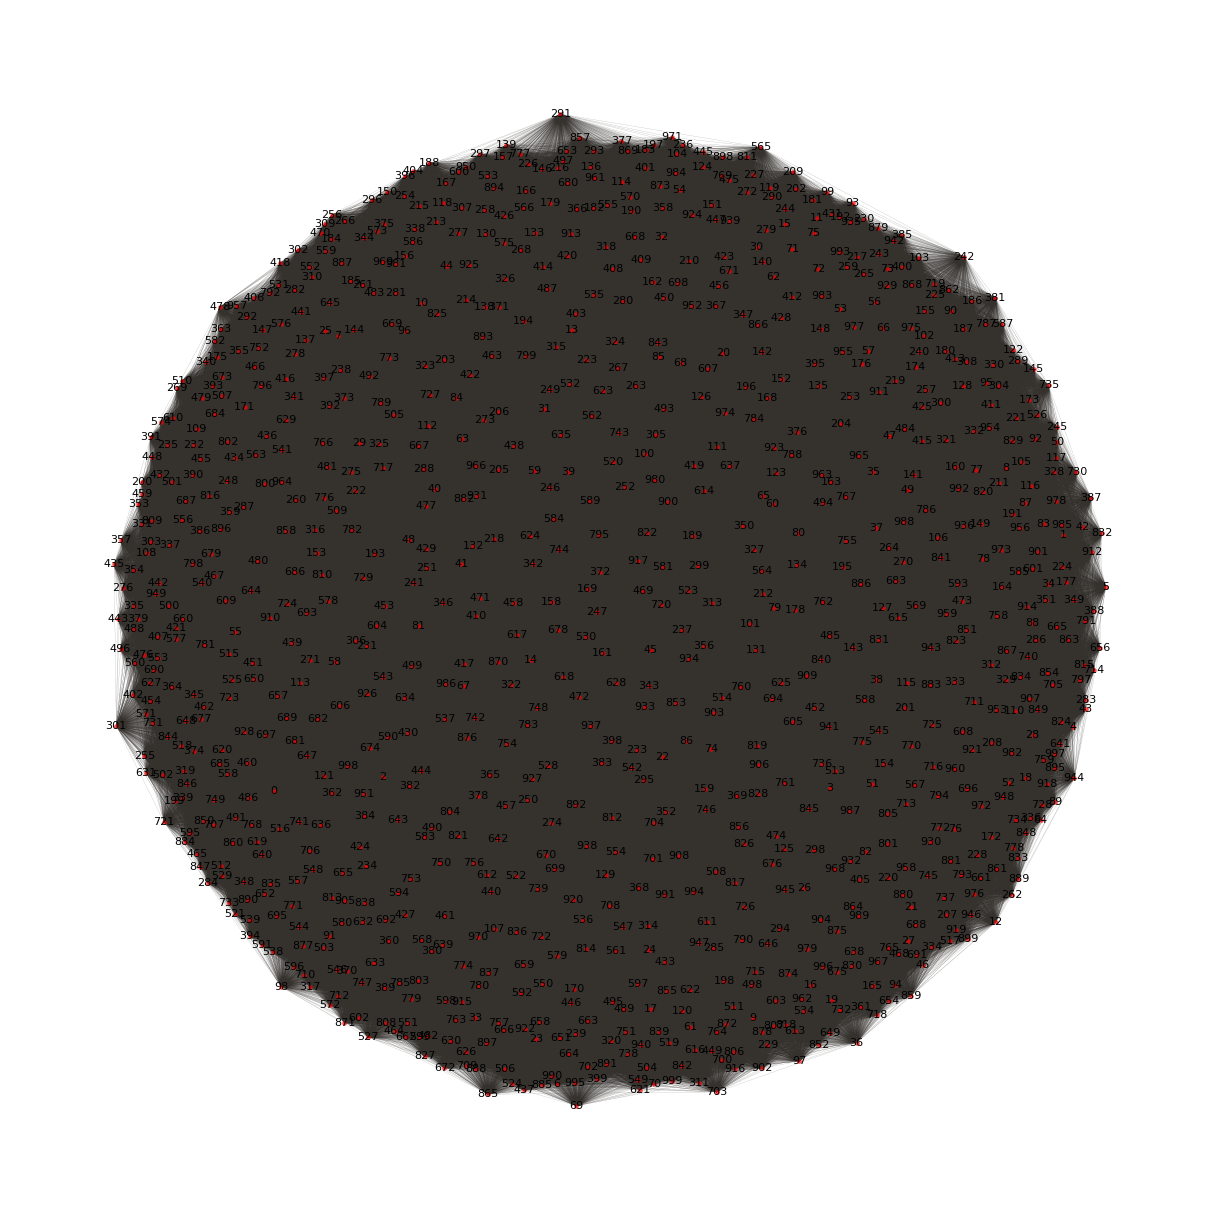

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
import random

n = 1000
p = 0.65

G = nx.Graph()


G.add_nodes_from(range(n))

# Genera las aristas del grafo
for node in range(n):
    for potential_neighbor in range(node + 1, n):
        if random.random() < p:
            G.add_edge(node, potential_neighbor)

plt.figure(figsize=(12, 12))
pos = nx.kamada_kawai_layout(G)


nx.draw(G, pos=pos, with_labels=False, node_size=10, node_color='red', edge_color='#35322E', width=0.1, alpha=0.7, linewidths=0.1)

# Añade etiquetas a los nodos con mayor grado para una mejor identificación
high_degree_nodes = [node for node, degree in G.degree() if degree > 50]
nx.draw_networkx_labels(G, pos, labels={node: node for node in high_degree_nodes}, font_size=8)

plt.axis('off')
plt.show()

#### $b)$ Contar cuántas veces aparece cada grado $(k = 0, 1, ..., N-1).$ Calcule el promedio de grados. Si $s$ es la suma total de todos los grados encontrados, hacer un gráfico de $k$ contra $\frac{grado(k)}{s}$

Aparicion de cada grado: 
[667, 649, 663, 650, 631, 628, 622, 642, 646, 629, 660, 644, 615, 669, 674, 659, 637, 637, 644, 643, 641, 644, 675, 632, 659, 643, 660, 637, 671, 655, 651, 669, 658, 640, 646, 647, 647, 660, 659, 651, 656, 659, 635, 629, 646, 677, 642, 663, 644, 660, 652, 651, 647, 651, 652, 639, 656, 651, 671, 665, 670, 645, 650, 660, 630, 658, 670, 676, 647, 597, 618, 641, 647, 651, 665, 638, 647, 655, 635, 667, 663, 672, 664, 637, 655, 658, 670, 631, 646, 628, 640, 662, 657, 638, 638, 647, 645, 646, 631, 648, 660, 641, 634, 611, 638, 648, 663, 667, 657, 647, 655, 639, 662, 665, 650, 656, 650, 618, 654, 646, 623, 669, 622, 658, 632, 660, 635, 654, 643, 660, 653, 679, 659, 640, 652, 646, 633, 666, 644, 629, 651, 655, 668, 665, 630, 644, 641, 633, 638, 641, 632, 648, 667, 645, 676, 662, 642, 628, 674, 661, 647, 654, 633, 645, 642, 640, 643, 646, 665, 687, 659, 652, 645, 629, 648, 647, 634, 661, 662, 648, 621, 620, 638, 637, 632, 639, 626, 648, 634, 659, 647, 647, 630, 646, 660

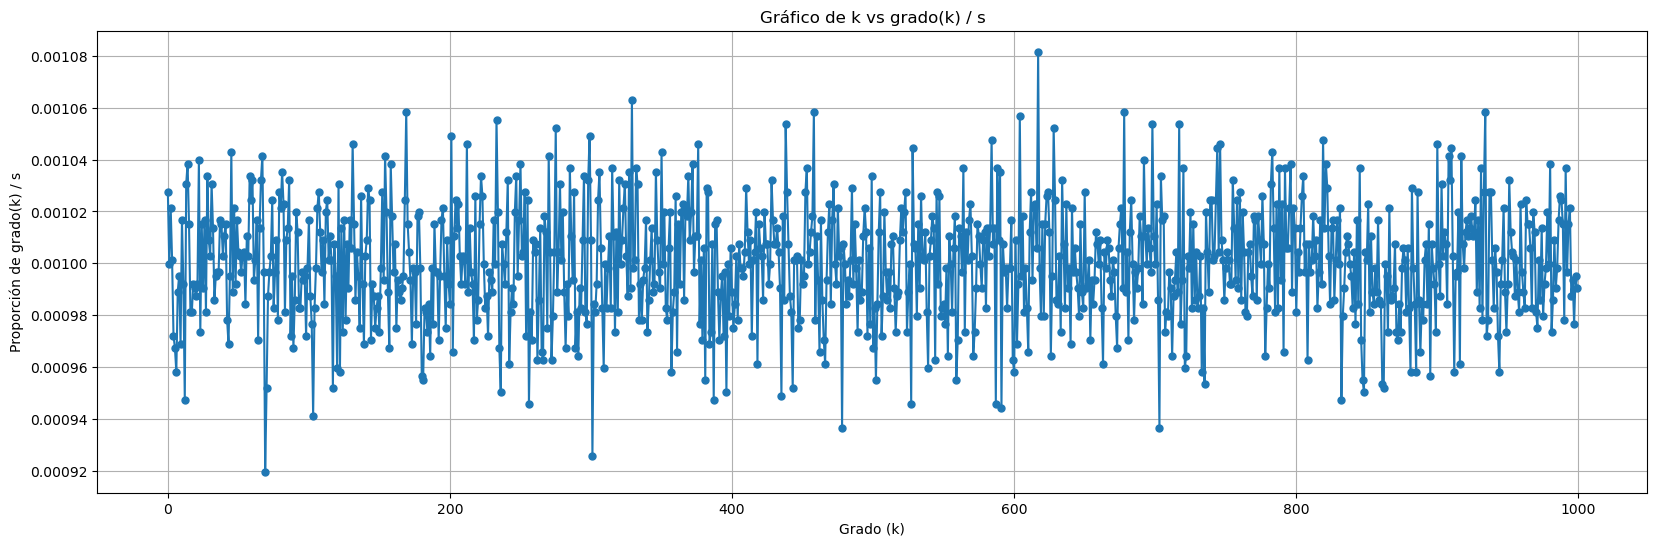

In [47]:
degree_count = nx.degree(G)
degrees = [count for _, count in degree_count]
print("Aparicion de cada grado: ")
print(degrees)
average_degree = sum(degrees) / len(degrees)

print(f"Promedio de grados: {average_degree}")

total_sum = sum(degrees)

degree_proportions = [count / total_sum for count in degrees]

plt.figure(figsize=(20, 6))
plt.plot(range(n), degree_proportions, marker='o', markersize=5)
plt.xlabel('Grado (k)')
plt.ylabel('Proporción de grado(k) / s')
plt.title('Gráfico de k vs grado(k) / s')
plt.grid(True)
plt.show()

Grado 0: 667 nodos
Grado 1: 649 nodos
Grado 2: 663 nodos
Grado 3: 650 nodos
Grado 4: 631 nodos
Grado 5: 628 nodos
Grado 6: 622 nodos
Grado 7: 642 nodos
Grado 8: 646 nodos
Grado 9: 629 nodos
Grado 10: 660 nodos
Grado 11: 644 nodos
Grado 12: 615 nodos
Grado 13: 669 nodos
Grado 14: 674 nodos
Grado 15: 659 nodos
Grado 16: 637 nodos
Grado 17: 637 nodos
Grado 18: 644 nodos
Grado 19: 643 nodos
Grado 20: 641 nodos
Grado 21: 644 nodos
Grado 22: 675 nodos
Grado 23: 632 nodos
Grado 24: 659 nodos
Grado 25: 643 nodos
Grado 26: 660 nodos
Grado 27: 637 nodos
Grado 28: 671 nodos
Grado 29: 655 nodos
Grado 30: 651 nodos
Grado 31: 669 nodos
Grado 32: 658 nodos
Grado 33: 640 nodos
Grado 34: 646 nodos
Grado 35: 647 nodos
Grado 36: 647 nodos
Grado 37: 660 nodos
Grado 38: 659 nodos
Grado 39: 651 nodos
Grado 40: 656 nodos
Grado 41: 659 nodos
Grado 42: 635 nodos
Grado 43: 629 nodos
Grado 44: 646 nodos
Grado 45: 677 nodos
Grado 46: 642 nodos
Grado 47: 663 nodos
Grado 48: 644 nodos
Grado 49: 660 nodos
Grado 50: 

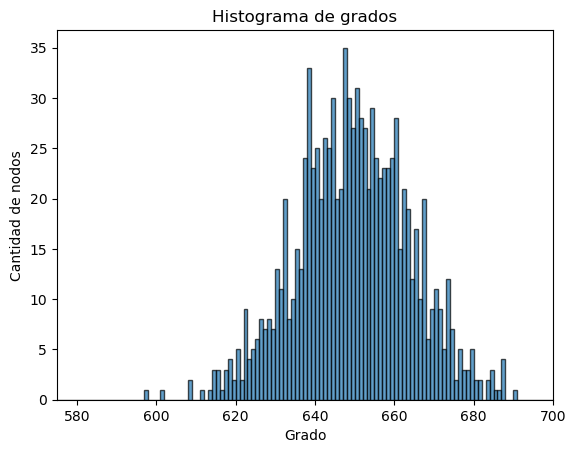

In [58]:
plt.hist(degrees, bins=range(max(degrees) + 2), alpha=0.7, edgecolor='black')
plt.xlim(575, 700)

# Añade etiquetas y título al gráfico
plt.xlabel("Grado")
plt.ylabel("Cantidad de nodos")
plt.title("Histograma de grados")

for degree, count in enumerate(degrees):
    print(f"Grado {degree}: {count} nodos")


#### $C)$ Graficar $p(D_i = k) = \binom{n-1}{k} p^k (1-p)^{n-k-1} \forall{k = 0, 1, ..., N-1}$

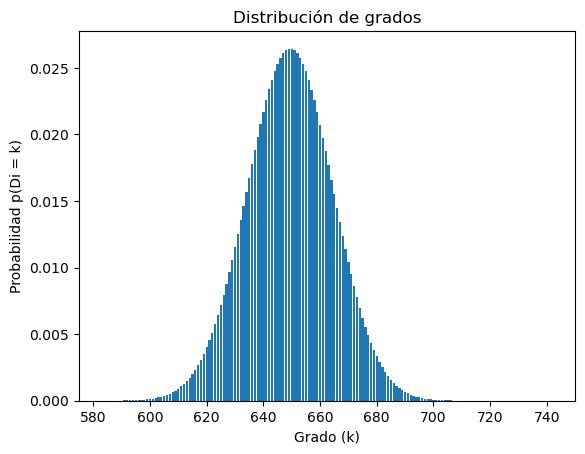

In [74]:
def binomial_prob(n, k, p):
    """
    Calcula la probabilidad binomial p(Di = k) dado n, k y p.
    """
    return math.comb(n-1, k) * (p ** k) * ((1-p) ** (n-k-1))

n = 1000
p = 0.65

# Calcula las probabilidades p(Di = k) para cada k
probabilities = [binomial_prob(n, k, p) for k in range(n)]


plt.bar(range(n), probabilities)
plt.xlim(575, 750)

plt.xlabel("Grado (k)")
plt.ylabel("Probabilidad p(Di = k)")
plt.title("Distribución de grados")


plt.show()

#### Hacer una tercer grafica que superponga las gráficas de $b)$ y $c)$